# Aerator Imports to Ecuador 2021 - 2024

Luis Paulo Vinatea Barberena  
@BarberNode  
Florianópolis, Brazil  
2025-05-27


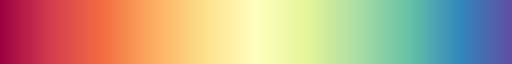

In [1]:
# Module Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


# Visualization settings
%matplotlib inline

# Configuration
INPUT_DIR = "../../data/raw/aquaculture/aerator_imports/"

# Global visualization settings
sns.color_palette("Spectral", as_cmap=True)


In [2]:
# Load all data using a for loop
aerator_data = {}
for i in range(2021, 2025):
    file_name = f"{i}_aerators"
    file_path = os.path.join(INPUT_DIR, f"{file_name}.csv")
    aerator_data[file_name] = pd.read_csv(file_path)


In [3]:
# Preview all the loaded datasets
for name, data in aerator_data.items():
    print(f"Dataset: {name}")
    print(data.head(), "\n")


Dataset: 2021_aerators
   DIA  MES   AÑO       REGIMEN ADUANERO              REFRENDO     DAU  ITEM  \
0    7    1  2021  IMPORTACION A CONSUMO  028-2021-10-00015273   939.0     1   
1    7    1  2021  IMPORTACION A CONSUMO  028-2021-10-00014969  3482.0     1   
2    7    1  2021  IMPORTACION A CONSUMO  028-2021-10-00015273   939.0    17   
3    7    1  2021  IMPORTACION A CONSUMO  028-2021-10-00015273   939.0    16   
4    7    1  2021  IMPORTACION A CONSUMO  028-2021-10-00015273   939.0    14   

   RUC IMPORTADOR PROBABLE IMPORTADOR PAIS DE ORIGEN  ... MODELO MERCADERIA  \
0    993250236001      ALFAGUYCA S.A.          CHINA  ...      DIVA- JDLN16   
1    992758791001        KARASTE S.A.          CHINA  ...          DIVA-D16   
2    993250236001      ALFAGUYCA S.A.          CHINA  ...      DIVA-D16-01S   
3    993250236001      ALFAGUYCA S.A.          CHINA  ...      DIVA-D16-02S   
4    993250236001      ALFAGUYCA S.A.          CHINA  ...      DIVA-D16-03S   

  US$ FOB UNIT FECHA 

In [4]:
# Print all columns NOT present in all datasets
all_columns = set.intersection(
    *(set(df.columns) for df in aerator_data.values())
)
for name, df in aerator_data.items():
    missing_columns = all_columns - set(df.columns)
    if missing_columns:
        print(f"Dataset: {name}")
        print(f"Missing columns: {missing_columns}\n")
# Print all columns present in all datasets
print("All datasets have the following columns:")
print(all_columns)


All datasets have the following columns:
{'PAIS DE PROCEDENCIA', 'ADVALOREM', 'CANTIDAD', 'NUMERO DE MANIFIESTO', 'VIA DE TRANSPORTE', 'DAU', 'FACTURA', 'REFRENDO', 'US$ FLETE', 'US$ CIF', 'NAVE', 'FECHA AFORO', 'MES', 'INCOTERM', 'PESO NETO KG', 'ITEM', 'EMPRESA DE TRANSPORTE', 'US$ FOB UNIT', 'AñO FABRICACIóN', 'DEPOSITO COMERCIAL', 'MODELO MERCADERIA', 'DESCRIPCION PRODUCTO COMERCIAL', 'MARCA', 'PROBABLE IMPORTADOR', 'ESTADO DE MERCANCIA', 'EMBARCADOR', 'UNIDAD DE MEDIDA', 'FECHA INGRESO SISTEMA', 'FECHA DE EMBARQUE', 'FECHA DE LIQUIDACIóN', 'MARCA COMERCIAL', 'AGENTE DE ADUANA', 'TIPO AFORO', 'AGENCIA DE CARGA', 'CODIGO DE LIBERACION', 'DIA', 'RUC IMPORTADOR', 'CONOCIMIENTO EMBARQUE', 'ADUANA', 'PRODUCTO', 'CIUDAD EMBARQUE', 'US$ SEGURO', 'NUMERO DE CARGA FINAL', 'PARTIDA ARANCELARIA', 'FECHA DE LLEGADA', 'REGIMEN ADUANERO', 'US$ FOB', 'CóDIGO TNAN', 'AÑO', 'CARACTERISTICAS', 'CONTENEDOR', 'BULTOS', 'DIRECCIóN CONSIGNATARIO', 'FECHA PAGO'}


In [49]:
# Keep only the columns that are present in all datasets and concatenate all datasets into one
all_columns_list = list(all_columns)  # Convert set to list for indexing
aerator_data_combined = pd.concat(
    [
        df[all_columns_list]
        for df in aerator_data.values()
        if set(all_columns).issubset(df.columns)
    ],
    ignore_index=True,
)
# Display the combined dataset
print(aerator_data_combined.head())

# Get the datatypes of the columns
print("\nData types of the columns:")
print(aerator_data_combined.dtypes, "\n")


  PAIS DE PROCEDENCIA  ADVALOREM  CANTIDAD NUMERO DE MANIFIESTO  \
0               CHINA        0.0      70.0      CEC2020PCIU0016   
1               CHINA        0.0      70.0      CEC2020WHLU5438   
2               CHINA        0.0      44.0      CEC2020PCIU0016   
3               CHINA        0.0      10.0      CEC2020PCIU0016   
4               CHINA        0.0      20.0      CEC2020PCIU0016   

  VIA DE TRANSPORTE     DAU          FACTURA              REFRENDO  US$ FLETE  \
0          MARITIMO   939.0      JH201030AG1  028-2021-10-00015273    8993.25   
1          MARITIMO  3482.0  JH201030SA48-GB  028-2021-10-00014969   10077.00   
2          MARITIMO   939.0      JH201030AG1  028-2021-10-00015273      31.42   
3          MARITIMO   939.0      JH201030AG1  028-2021-10-00015273      48.18   
4          MARITIMO   939.0      JH201030AG1  028-2021-10-00015273      48.18   

     US$ CIF  ... FECHA DE LLEGADA       REGIMEN ADUANERO   US$ FOB  \
0  112033.25  ...       20201230.0  IMP

In [6]:
# Convert specific columns to appropriate data types

columns_to_convert = {
    "FECHA DE LIQUIDACIóN": "datetime64[ns]",
    "FECHA DE LLEGADA": "datetime64[ns]",
    "FECHA DE EMBARQUE": "datetime64[ns]",
    "FECHA PAGO": "datetime64[ns]",
    "FECHA INGRESO SISTEMA": "datetime64[ns]",
}

for col, dtype in columns_to_convert.items():
    aerator_data_combined[col] = aerator_data_combined[col].astype(dtype)
# Display the data types after conversion
print("\nData types after conversion:")
print(aerator_data_combined.dtypes)



Data types after conversion:
PAIS DE PROCEDENCIA                       object
ADVALOREM                                float64
CANTIDAD                                 float64
NUMERO DE MANIFIESTO                      object
VIA DE TRANSPORTE                         object
DAU                                      float64
FACTURA                                   object
REFRENDO                                  object
US$ FLETE                                float64
US$ CIF                                  float64
NAVE                                      object
FECHA AFORO                               object
MES                                        int64
INCOTERM                                  object
PESO NETO KG                             float64
ITEM                                       int64
EMPRESA DE TRANSPORTE                     object
US$ FOB UNIT                             float64
AñO FABRICACIóN                          float64
DEPOSITO COMERCIAL                     

In [7]:
# Check for missing values in the combined dataset
missing_values = aerator_data_combined.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])
# Print the shape of the combined dataset
print("\nShape of the combined dataset:")
print(aerator_data_combined.shape)

# Preview the shape if we drop all rows with missing values
aerator_data_combined_dropped = aerator_data_combined.dropna()
print("\nShape of the dataset after dropping rows with missing values:")
print(aerator_data_combined_dropped.shape)



Missing values in each column:
NUMERO DE MANIFIESTO        16
DAU                        218
FACTURA                    218
NAVE                        30
FECHA AFORO                 88
INCOTERM                   218
EMPRESA DE TRANSPORTE       53
US$ FOB UNIT                 1
AñO FABRICACIóN             62
DEPOSITO COMERCIAL         257
MODELO MERCADERIA          221
MARCA                      243
EMBARCADOR                  19
FECHA DE EMBARQUE           27
FECHA DE LIQUIDACIóN        23
MARCA COMERCIAL            245
TIPO AFORO                  73
CODIGO DE LIBERACION       746
CONOCIMIENTO EMBARQUE       56
PRODUCTO                   218
CIUDAD EMBARQUE             30
NUMERO DE CARGA FINAL       57
FECHA DE LLEGADA            14
CARACTERISTICAS            218
DIRECCIóN CONSIGNATARIO     14
FECHA PAGO                 303
dtype: int64

Shape of the combined dataset:
(1764, 54)

Shape of the dataset after dropping rows with missing values:
(694, 54)


In [30]:
# Dictionary of values that are the same but treated as unique
brand_mapping = {
    "SIN MARCA": "GENERICO",
    "S/MARCA": "GENERICO",
    "SINMARCA": "GENERICO",
    "SMARCA": "GENERICO",
    "S/M": "GENERICO",
    "SM": "GENERICO",
    "N-M": "GENERICO",
    "AEROMIX SYSTEMS": "AEROMIX",
}

model_mapping = {
    "SIN MODELO": "GENERICO",
    "SIN MODELO,": "GENERICO",
    "S/MODELO": "GENERICO",
    "SMODELO": "GENERICO",
    "S/M": "GENERICO",
    "SM": "GENERICO",
    "N-M": "GENERICO",
}

product_mapping = {
    "AERADOR": "AIREADOR",
    "AIREADORES": "AIREADOR",
    "AIREADORAS": "AIREADOR",
    "AIREADORAS DE AGUA": "AIREADOR",
    "AIREADORES DE AGUA": "AIREADOR",
    "AIREADORES DE AGUA DULCE": "AIREADOR",
    "AIREADORES DE AGUA SALADA": "AIREADOR",
    "AIREADORES DE AGUA MARINA": "AIREADOR",
    "SET DE AIREADORES": "AIREADOR",
    "AIREADORES DE 8 PALETAS": "AIREADOR",
    "AIREADORES DE 12 PALETAS": "AIREADOR",
    "AIREADORES DE 16 PALETAS": "AIREADOR",
    "AIREADORES DE 3 HP": "AIREADOR",
    "AIREADORES DE 5 HP": "AIREADOR",
    "AIREADORES DE 3.5 HP": "AIREADOR",
    "AIREADORES DE 2 HP": "AIREADOR",
    "AIREADOR DE 4 PALETAS": "AIREADOR",
    "AIREADOR DE 8 PALETAS": "AIREADOR",
    "AIREADOR DE 12 PALETAS": "AIREADOR",
    "AIREADOR DE 16 PALETAS": "AIREADOR",
    "AIREADOR DE 3 HP": "AIREADOR",
    "AIREADOR DE 5 HP": "AIREADOR",
    "AIREADOR DE 3.5 HP": "AIREADOR",
    "AIREADOR DE 2 HP": "AIREADOR",
    "AIREADORES DE 16 PALETAS PARA MEZCLAR OXIGENO CON MOTOR": "AIREADOR",
    "MULTI IMPULSOR AIREADOR DE PALETAS": "AIREADOR",
    "AIREADOR SANIPERL-DL": "AIREADOR",
    "AIREADORES 3 HP 460V": "AIREADOR",
    "AIREADORES 3.5 HP 440V": "AIREADOR",
    "PALETA DE AIREADORES FUDU": "PALETAS PARA AIREADOR",
}

# Create a clean working copy to avoid SettingWithCopyWarning
aerator_data_clean = aerator_data_combined_dropped.copy()

# Fill NaN values in brand, model and product columns with "GENERICO"
aerator_data_clean["MARCA"] = aerator_data_clean["MARCA"].fillna("GENERICO")
aerator_data_clean["MODELO MERCADERIA"] = aerator_data_clean[
    "MODELO MERCADERIA"
].fillna("GENERICO")
aerator_data_clean["DESCRIPCION PRODUCTO COMERCIAL"] = aerator_data_clean[
    "DESCRIPCION PRODUCTO COMERCIAL"
].fillna("GENERICO")

# Apply the mappings to the 'MARCA', 'MODELO MERCADERIA' and 'DESCRIPCION PRODUCTO COMERCIAL' columns
aerator_data_clean["MARCA"] = aerator_data_clean["MARCA"].replace(
    brand_mapping
)
aerator_data_clean["MODELO MERCADERIA"] = aerator_data_clean[
    "MODELO MERCADERIA"
].replace(model_mapping)
aerator_data_clean["DESCRIPCION PRODUCTO COMERCIAL"] = aerator_data_clean[
    "DESCRIPCION PRODUCTO COMERCIAL"
].replace(product_mapping)

# Standardize case (uppercase) for consistency
aerator_data_clean["MARCA"] = aerator_data_clean["MARCA"].str.upper()
aerator_data_clean["MODELO MERCADERIA"] = aerator_data_clean[
    "MODELO MERCADERIA"
].str.upper()
aerator_data_clean["DESCRIPCION PRODUCTO COMERCIAL"] = aerator_data_clean[
    "DESCRIPCION PRODUCTO COMERCIAL"
].str.upper()

# Also clean the MARCA COMERCIAL column for consistency
aerator_data_clean["MARCA COMERCIAL"] = aerator_data_clean[
    "MARCA COMERCIAL"
].fillna("GENERICO")
aerator_data_clean["MARCA COMERCIAL"] = aerator_data_clean[
    "MARCA COMERCIAL"
].replace(brand_mapping)
aerator_data_clean["MARCA COMERCIAL"] = aerator_data_clean[
    "MARCA COMERCIAL"
].str.upper()

# Display summary of cleaned data
print(f"Total records: {len(aerator_data_clean)}")
print(
    f"Records with non-generic brands: {sum(aerator_data_clean['MARCA'] != 'GENERICO')}"
)
print(
    f"Records with non-generic models: {sum(aerator_data_clean['MODELO MERCADERIA'] != 'GENERICO')}"
)

# Display the top 10 most common values in the 'MARCA' and 'MODELO MERCADERIA' columns
print("\nTop 10 most common brands:")
print(aerator_data_clean["MARCA"].value_counts().head(10))
print("\nTop 10 most common models:")
print(aerator_data_clean["MODELO MERCADERIA"].value_counts().head(10))


Total records: 694
Records with non-generic brands: 290
Records with non-generic models: 343

Top 10 most common brands:
MARCA
GENERICO    404
NEOPERL      65
DIVA         21
FV           14
AQUARAME     12
RENAULT      11
BERAQUA      11
WALKER       10
TEKA          8
ACQUAECO      8
Name: count, dtype: int64

Top 10 most common models:
MODELO MERCADERIA
GENERICO           351
PA-308              19
40200103315         11
44303403304         10
40100102305          8
ZUMA                 8
55650-37060-B0       7
43220145002          6
39080 16HPW-16I      6
96764769ZD           6
Name: count, dtype: int64


In [31]:
# Display the top 10 most common product descriptions
print("\nTop 10 most common product descriptions:")
print(
    aerator_data_clean["DESCRIPCION PRODUCTO COMERCIAL"]
    .value_counts()
    .head(10)
)



Top 10 most common product descriptions:
DESCRIPCION PRODUCTO COMERCIAL
AIREADOR                             206
PALETAS PARA AIREADOR                 10
PARTE AIREADOR - JUNTAS                8
BANDA PARA AIREADORES                  8
BOYA DE AIREADOR ELECTRICO SULONG      7
AIREADORES PANEL INSTRUMENTOS          7
AIREADOR OCULTO COIN SLOT              7
AIREADOR COCINA                        6
ELEMENTO AIREADOR                      5
AIREADOR DIESEL SET                    5
Name: count, dtype: int64


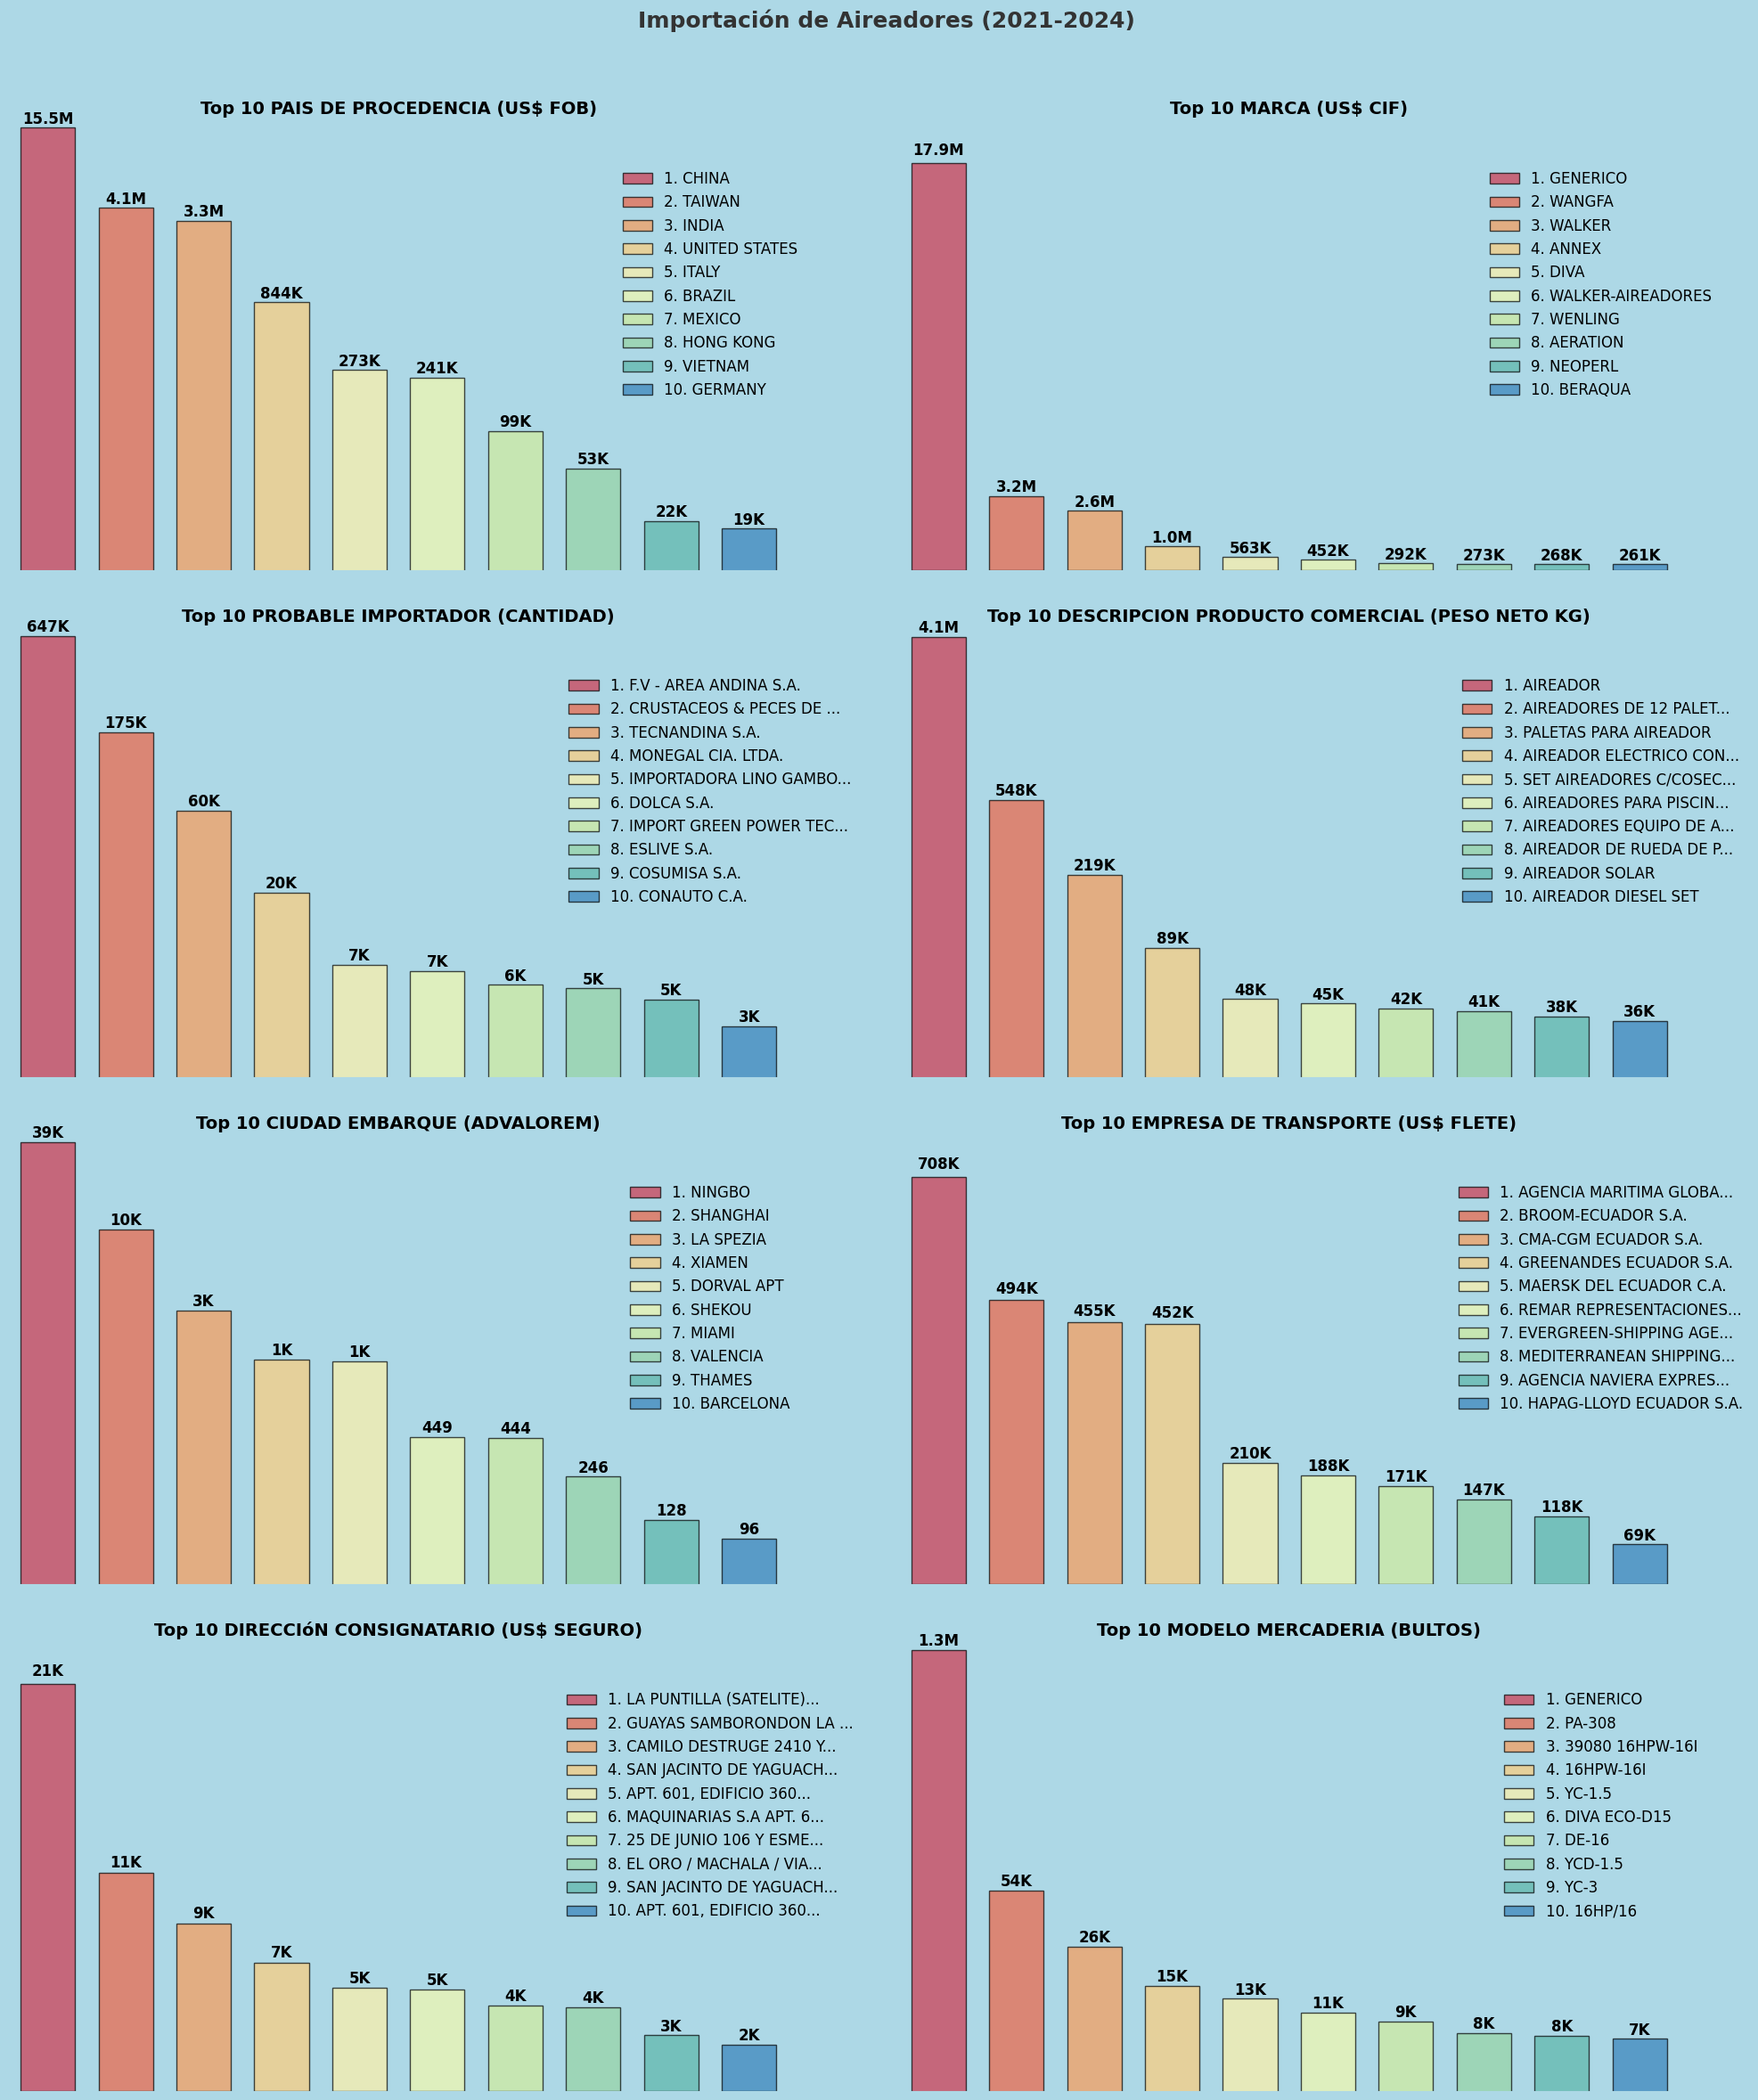

In [32]:
# Create a dashboard of bar charts
def create_dashboard(df, figsize=(20, 24)):
    # Select some important columns for analysis
    # Numeric columns for y-axis values
    numeric_cols = [
        "US$ FOB",
        "US$ CIF",
        "CANTIDAD",
        "PESO NETO KG",
        "ADVALOREM",
        "US$ FLETE",
        "US$ SEGURO",
        "BULTOS",
    ]
    # Categorical columns for x-axis
    categorical_cols = [
        "PAIS DE PROCEDENCIA",
        "MARCA",
        "PROBABLE IMPORTADOR",
        "DESCRIPCION PRODUCTO COMERCIAL",
        "CIUDAD EMBARQUE",
        "EMPRESA DE TRANSPORTE",
        "DIRECCIóN CONSIGNATARIO",
        "MODELO MERCADERIA",
    ]

    # Create a 4X2 grid of bar charts to accommodate more categories
    fig, axes = plt.subplots(4, 2, figsize=figsize)
    axes = axes.flatten()
    # Set the background color for the figure
    fig.patch.set_facecolor("lightblue")
    # Set the background color for each axis
    for ax in axes:
        ax.set_facecolor("lightblue")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_color("lightblue")
        ax.spines["bottom"].set_color("lightblue")
    # Set the title for the entire figure
    fig.suptitle(
        "Importación de Aireadores (2021-2024)",
        fontsize=18,
        fontweight="bold",
        color="#333333",
        y=0.98,
    )

    # For each pair of numeric and categorical columns
    for i, (num_col, cat_col) in enumerate(
        zip(numeric_cols, categorical_cols)
    ):
        if i < len(axes):
            # Group by the categorical column and sum the numeric values
            grouped_data = (
                df.groupby(cat_col)[num_col]
                .sum()
                .nlargest(10)
                .sort_values(ascending=False)
            )

            # Get minimum non-zero value for log scale
            min_value = (
                grouped_data[grouped_data > 0].min()
                if any(grouped_data > 0)
                else 1
            )

            # Generate colors for each bar
            n_colors = len(grouped_data)
            colors = sns.color_palette("Spectral", n_colors=n_colors)

            # Create vertical bar chart using seaborn without palette parameter
            bars = sns.barplot(
                x=grouped_data.index,
                y=grouped_data.values,
                ax=axes[i],
                edgecolor="black",
                alpha=0.7,
                legend=False,
                width=0.7,
            )

            # Manually set colors for each bar to avoid deprecation warning
            for bar, color in zip(bars.patches, colors):
                bar.set_facecolor(color)

            # Use semi-log scale for better representation of small values
            if (
                grouped_data.max() / min_value > 100
            ):  # Only use log scale if the range is large
                axes[i].set_yscale(
                    "symlog"
                )  # Use symlog scale to handle zeros
                axes[i].set_ylim(min_value * 0.5, grouped_data.max() * 1.1)
            else:
                # For smaller ranges, use linear scale but start from a lower value
                axes[i].set_ylim(0, grouped_data.max() * 1.1)

            # Hide y-axis tick labels to avoid scientific notation display
            axes[i].set_yticklabels([])

            # Hide x and y axis tick marks for cleaner look
            axes[i].tick_params(axis="both", which="both", length=0)

            # Customize the chart - now with no axis labels
            axes[i].set_title(
                f"Top 10 {cat_col} ({num_col})",
                fontsize=14,
                fontweight="bold",
                ha="center",
            )

            # Remove x and y labels for cleaner look
            axes[i].set_ylabel("")
            axes[i].set_xlabel("")

            # Add value labels to the bars
            for bar in bars.patches:
                height = bar.get_height()
                value_text = f"{height:,.0f}"
                if height > 1000000:  # Format large numbers with M suffix
                    value_text = f"{height / 1000000:.1f}M"
                elif height > 1000:
                    value_text = f"{height / 1000:.0f}K"

                axes[i].text(
                    bar.get_x() + bar.get_width() / 2,
                    height * 1.01,  # Position text just above bar
                    value_text,
                    ha="center",
                    va="bottom",
                    fontsize=12,
                    fontweight="bold",
                    rotation=0,
                )

            # Hide x-tick labels since we have a legend
            plt.setp(axes[i].get_xticklabels(), visible=False)

            # Create a custom legend
            legend_elements = []
            for j, (cat, val) in enumerate(grouped_data.items()):
                if pd.notna(cat):  # Skip if category is NaN
                    # Truncate long names
                    display_name = str(cat)
                    if len(display_name) > 25:
                        display_name = display_name[:22] + "..."
                    legend_elements.append(
                        plt.Rectangle(
                            (0, 0),
                            1,
                            1,
                            fc=colors[j],
                            alpha=0.7,
                            edgecolor="black",
                            label=f"{j + 1}. {display_name}",
                        )
                    )

            # Place legend below the chart
            axes[i].legend(
                handles=legend_elements,
                loc="upper center",
                bbox_to_anchor=(0.90, 0.92),
                ncol=1,
                fontsize=12,
                frameon=False,
            )

            # Add 1-10 numbers on x-axis for reference
            axes[i].set_xticks(np.arange(len(grouped_data)))
            axes[i].set_xticklabels(range(1, len(grouped_data) + 1))

            # Add grid lines for y-axis only for better readability
            axes[i].grid(axis="y", linestyle="", alpha=0.3)

    plt.tight_layout(rect=[0, 0, 1, 0.96], h_pad=3.0, w_pad=2.0)
    return fig


# Call the function with the dataset
fig = create_dashboard(aerator_data_clean)
plt.show()


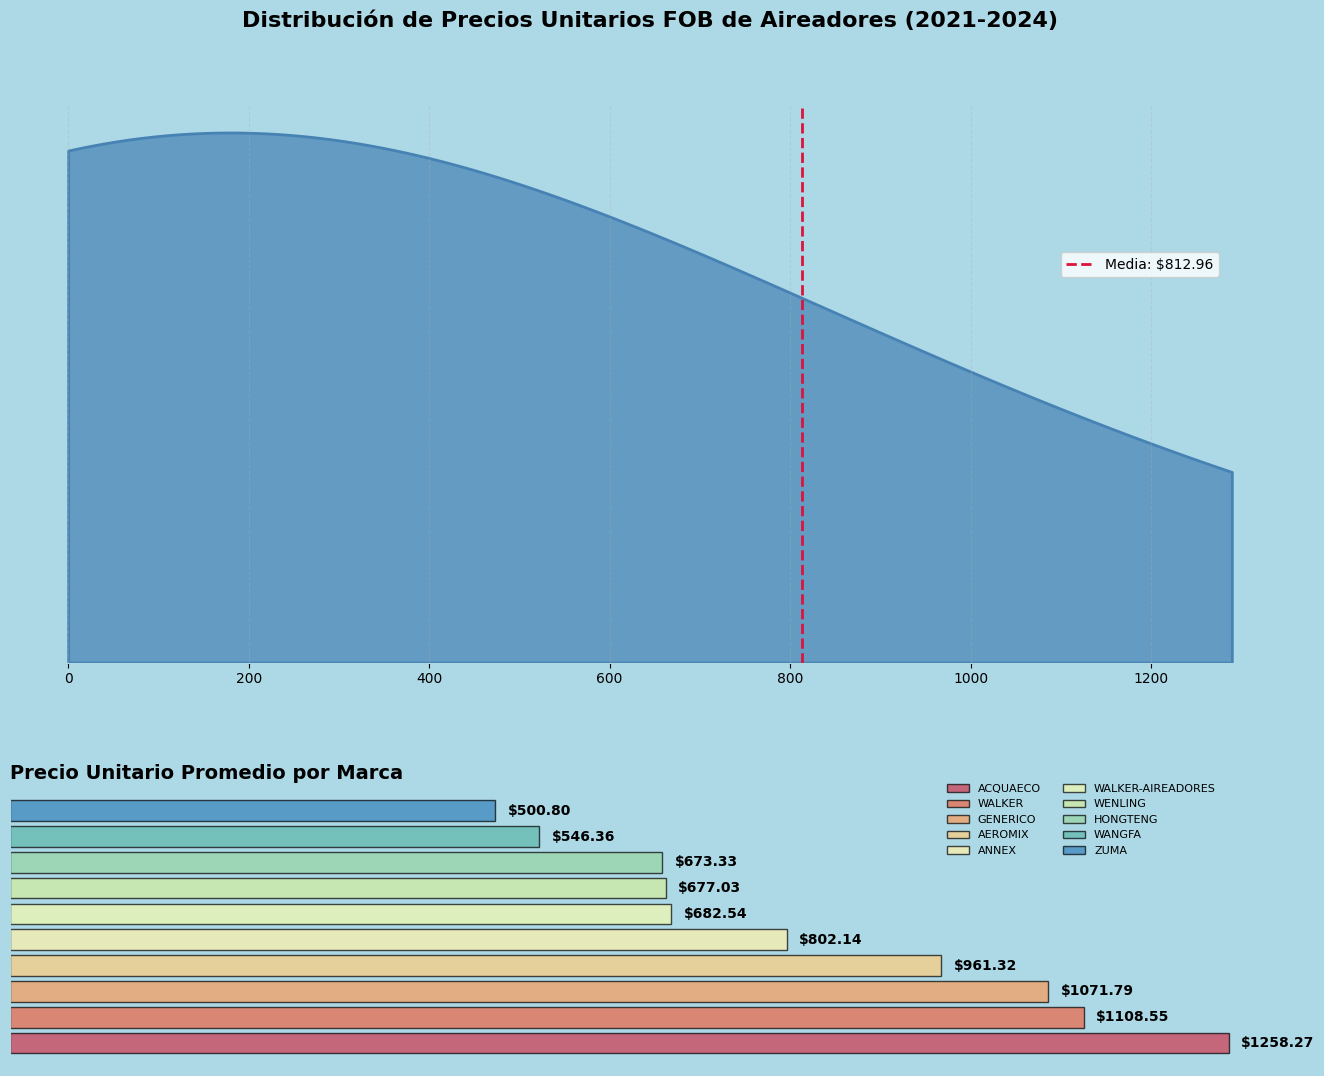

In [48]:
# Get FOB Unit prices and remove any NaN values
unit_prices = aerator_data_clean["US$ FOB UNIT"].dropna()

# Calculate statistics
mean_price = unit_prices.mean()
median_price = unit_prices.median()
std_price = unit_prices.std()
count = len(unit_prices)

# Get top 10 brands by CANTIDAD
top_brands_by_quantity = (
    aerator_data_clean.groupby("MARCA")["CANTIDAD"]
    .sum()
    .nlargest(10)
    .sort_values(ascending=False)
)

# Set reasonable limits for better visualization - exclude extreme outliers
lower_limit = 0
upper_limit = np.percentile(unit_prices, 95)  # 95th percentile

# Create figure with two subplots stacked vertically
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(16, 12), height_ratios=[2, 1], gridspec_kw={"hspace": 0.3}
)

# Create KDE plot with linear scale on the top subplot
sns.kdeplot(
    data=unit_prices,
    fill=True,
    color="steelblue",
    alpha=0.7,
    linewidth=2,
    clip=(lower_limit, upper_limit),
    bw_adjust=0.5,  # Adjust bandwidth for smoother distribution
    ax=ax1,
)

# Add vertical lines for mean and median on linear plot
ax1.axvline(
    mean_price,
    color="crimson",
    linestyle="--",
    linewidth=2,
    label=f"Media: ${mean_price:.2f}",
)

# Set background color and grid for linear plot
ax1.set_facecolor("lightblue")
ax1.grid(True, alpha=0.3, linestyle="--")

# Remove y-tick labels for cleaner look
ax1.set_yticks([])

# Improve title and labels for linear plot
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.legend(loc="upper right", bbox_to_anchor=(0.95, 0.75))
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_color("lightblue")
ax1.spines["bottom"].set_color("lightblue")


# Get ALL brands' average prices, not just the top 10 by quantity
all_brands_avg_price = aerator_data_clean.groupby("MARCA")[
    "US$ FOB UNIT"
].mean()

# Filter to only brands with average price between $500 and $1500
filtered_brands = all_brands_avg_price[
    (all_brands_avg_price >= 500) & (all_brands_avg_price <= 1500)
]

# Take the top 10 brands in this price range (or all if less than 10)
filtered_avg_price_by_brand = filtered_brands.nlargest(10)

# Generate colors for the bars
colors = sns.color_palette("Spectral", len(filtered_avg_price_by_brand))
bars = ax2.barh(
    y=range(len(filtered_avg_price_by_brand)),
    width=filtered_avg_price_by_brand.values,
    color=colors,
    alpha=0.7,
    edgecolor="black",
    linewidth=1,
)

# Set y-tick labels to brand names
# ax2.set_yticks(range(len(filtered_avg_price_by_brand)))
# ax2.set_yticklabels(filtered_avg_price_by_brand.index)

# Remove y-tick and x-tick labels for cleaner look
ax2.set_yticks([])
ax2.set_xticks([])

# Add value labels to the bars
for i, (bar, value) in enumerate(
    zip(bars, filtered_avg_price_by_brand.values)
):
    ax2.text(
        value
        + max(filtered_avg_price_by_brand)
        * 0.01,  # Slightly offset from the end of bar
        i,
        f"${value:.2f}",  # Format as currency with 2 decimal places
        va="center",
        fontsize=10,
        fontweight="bold",
    )

# Set background color and grid for the bar chart
ax2.set_facecolor("lightblue")
ax2.grid(axis="x", alpha=0.3, linestyle="--")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_color("lightblue")
ax2.spines["bottom"].set_color("lightblue")

ax2.legend(
    bars,
    filtered_avg_price_by_brand.index,
    loc="upper right",
    facecolor="lightblue",
    bbox_to_anchor=(0.95, 1.05),
    fontsize=8,
    ncols=2,
    edgecolor="lightblue",
)

# Set title and labels for the brand price plot
ax2.set_title(
    "Precio Unitario Promedio por Marca",
    fontsize=14,
    fontweight="bold",
    loc="left",
)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Overall figure title
fig.suptitle(
    "Distribución de Precios Unitarios FOB de Aireadores (2021-2024)",
    fontsize=16,
    fontweight="bold",
    y=0.98,
)
# Set the figure background color
fig.patch.set_facecolor("lightblue")

# Replace plt.tight_layout() with fig.subplots_adjust() to avoid the warning
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.4)

plt.show()
